# Branching ratios

A newly discovered particle was found to be able to decay in two different ways (two different decay channels): A and B. The probability $f_A$ for decay A to happen is called its _branching ratio_.

## Tasks


a) For a fixed number N of observed decays, explain why the number of decays to channel A should follow a binomial distribution.

b) Write down the conditional p.d.f. (aka posterior probability distribution) obtained via Bayes' theorem $P(f_A|\vec{k})$ where $\vec{k}$ are your observations. Explain the parameters and the different terms. What do you want to describe with $P(f_A|\vec{k})$?

c) Assuming a flat prior for the branching ratio $\pi(f_A)=1 \forall f_A\in[0,1]$ calculate and draw the posterior probability distribution for $f_A$ after measuring a single decay, which went to A.

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "A", "B", "B", "A"

e) Calculate and draw the posterior after observing 100 decays, with 63 going to A.


### Hints

1. It is recommended to not start coding right away.
1. Realize what **one experiment** means in this task and how you then construct your Likelihood.

You can solve this problem by explicitly going through the single steps of the calculations. When representing the distributions with numpy arrays, 'np.sum()' comes in handy in the calculation of the normalization. Alternatively, you can also use the beta pdf which was discussed in the lecture and which is accessible through the scipy.stats package 'from scipy.stats import beta‘.


# a)
$$ P(A) = \sum P(\{ (e_1,...,e_N) \})  =  {{N}\choose{k}} \cdot p^kq^{N-k}$$
independend decay channels, limited N

Similarly to tossing a coin: ${{N}\choose{k}}$ denotes the number of possibilities to distribute $k$ chosen decays in a set of $N$ observed ones. Since this factor incorporates all possible ways of arrangement, it has to be multiplied with the respective probabilities, being $p^k$ and $q^{N-k}$, whereas $p$ denotes the decay probability into channel A and $q$ the probability into all other decay channels. This is why later on $q=1-p$ is set.

# b)
$f_A$ denotes the probability for decay A to happen. Using the binomial distribution shown in a) this yields:
$$f(k|f_A) = {{N}\choose{k}} \cdot f_A^k(1-f_A)^{N-k}$$
Now Bayes' theorem states that:
$$P(f_A|k)=\frac{f(k|f_A)\pi (f_A)}{\int_0^1 f(k|f_A')\pi (f_A')df_A'}$$
whereas $\pi (f_A)$ identifies the prior probability distribution.

$f(k|f_A)=f(k|f_A,N)$ represents the Likelihood for $k$ decay channels into A given the probability $f_A$ and the number of observed decays, which is why $f_A$ is treated as variable determining the distributions overall shape.

$P(f_A|k)$ is the so called posterior, being a probability function of $f_A$ under consideration of $k$ and $N$.

To sum up, in this experiment $f_A$ should be estimated. This is done using a known distribution labeling the decays $f(k|f_A, N)$ known as Likelihood and a prior-function $\pi(f_A)$ identifying the previous probability distribution, hence it is changed after each observed decay.

$$P(f_A|k) \propto f(k|f_A)\pi(f_A)$$ (up to normalization)

# c)
- $\pi(f_A)=1 \forall f_A\in[0,1]$ 
- N=1, k = 1
- $f(k=1|f_A) =f_A$
- $\int_0^1f_A'df_A' = \frac{1}{2}$
- $P(f_A|k=1) = 2f_A$
linear, slope = 2, interval [0,1]

# d)
Now $\pi (f_A)=2f_A$, N=2, k=2:
- $f(k=2|f_A)=f_A^2$
- $P(f_A|k=2)=\frac{f_A^2 2f_A}{\int_0^1x^2 2x dx}=4f_A^3$

Then $\pi (f_A)=4f_A^3$, N=3, k=2:
- $f(k=2|f_A) = 3f_A^2(1-f_A)$
- $P(f_A|k=2)=\frac{3f_A^2(1-f_A) 4f_A^3}{\int_0^1 3x^2(1-x)4x^3dx}=42f_A^5(1-f_A)$

Again $\pi (f_A) = 42f_A^5(1-f_A)$, N=4, k=2:
- $f(k=2|f_A) = 6f_A^2(1-f_A)^2$
- $P(f_A|k=2)=\frac{252f_A^7(1-f_A)^3}{\int_0^1 252x^7(1-x)^3dx} = 1320f_A^7(1-f_A)^3$

Finally: $\pi (f_A)=1320f_A^7(1-f_A)^3$, N=5, k=3:
- $f(k=3|f_A) = 10f_A^3(1-f_A)^2$
- $P(f_A|k=3)=\frac{f_A^{10}(1-f_A)^5}{\int_0^1 x^{10}(1-x)^5dx} = 1320f_A^7(1-f_A)^3$

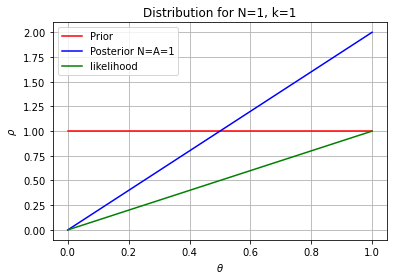

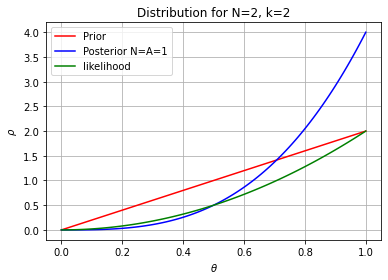

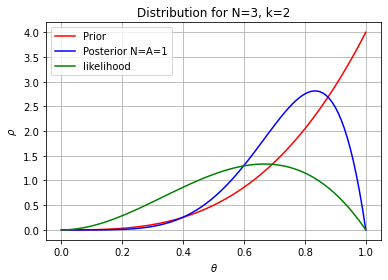

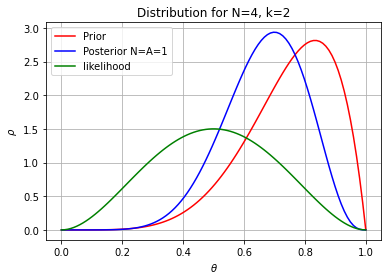

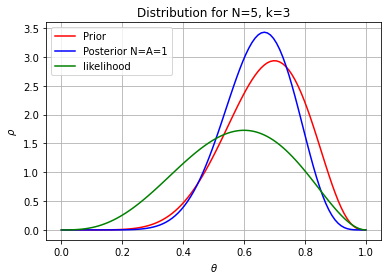

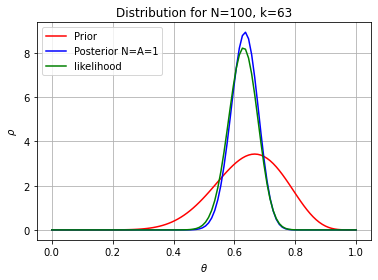

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

def calc_likelihood(x, N, k):
    p_K = scipy.stats.binom(N, x).pmf(k) #see a)
    likelihood = N*p_K #simple product
    return likelihood
def calc_prior(x, a, b):
    return scipy.stats.beta(a,b).pdf(x) #prior, beta-pdf
def calc_posterior(x, a_old, b_old, N, k):
    a_new = a_old + k
    b_new = b_old + N - k
    posterior = scipy.stats.beta(a_new, b_new).pdf(x) #conjugate-> update a, b
    return posterior, a_new, b_new
def display(plt):
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\rho$')
    plt.legend()
    plt.grid()
    plt.show()
def make_plot(n,k):
    global a #global since a is defined outside function
    global b #the same goes for b
    x = np.linspace(0, 1, 100)
    prior = calc_prior(x, a, b)
    posterior, a, b = calc_posterior(x, a, b, n, k) #change a and b accordingly
    likelihood = calc_likelihood(x, n, k)
    plt.title(r'Distribution for N={0}, k={1}'.format(n,k))
    plt.plot(x, prior, c='r',label='Prior')
    plt.plot(x, posterior, c='b', label='Posterior N=A=1')
    plt.plot(x, likelihood, c='g', label='likelihood')
    display(plt)
a, b = 1, 1
make_plot(1,1)
make_plot(2,2)
make_plot(3,2)
make_plot(4,2)
make_plot(5,3)
make_plot(100, 63)